<h1 style="color:rgb(0,120,170)">Logistic Regression</h1>

In [124]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt

In [125]:
"""
Function that computes the logistic gradient
@param w, np array, weights
@param x, np array, data matrix
@param y, np array, data labels

@output gradient, np array, gradient vector
"""
def logistic_gradient(w, x, y):

    gradient = np.zeros(x.shape[1])
    for i in range(x.shape[0]):
        gradient += x[i,:]*(y[i] - (1/(1 + np.exp(-(w.T @ x[i,:])))))
    gradient = gradient * -1
    return gradient

In [126]:
"""
Function that computes the cross-entropy loss
@param w, np array, weights
@param x, np array, data matrix
@param y, np array, data labels

@output loss, float, cross-entropy loss
"""
def cost(w, x, y):
    loss = 0
    for i in range(x.shape[0]):
        loss -= y[i]*np.log(1/(1 + np.exp(-(w.T @ x[i,:])))) + (1-y[i])*np.log(1 - (1/(1 + np.exp(-(w.T @ x[i,:])))))
    return loss

In [127]:
"""
Function that computes the numerical gradient
@param w, np array, weights
@param x, np array, data matrix
@param y, np array, data labels

@output dw, np array, numerical gradient
"""
def numerical_gradient(w, x, y):
    e = 1e-4
    E = np.identity(len(w))
    dw = np.zeros_like(w)
    for i in range(len(w)):
        dw[i] = (cost(w+e*E[i],x,y) - cost(w-e*E[i],x,y))/(2*e)
    return dw

In [128]:
"""
Function that generates a random matrix X and the random vectors y and weights
@param nr_samples, int, the number of samples you should generate
@param nr_features, int, the number of feature each sample has

@output X_random, np array, random samples
@output y_random, np array, random targets
@output w_random, np array, random weights
"""
def generate_random(nr_samples, nr_features):
    X_random = np.random.normal(size=(nr_features, nr_samples))
    y_random = np.random.randint(low=0,high=2,size=(nr_features,))
    w_random = np.random.normal(size=(nr_samples,))
    return X_random, y_random, w_random

In [129]:
"""
Function that compares two array 
@param grad_a, np array, the analytical gradient
@param grad_n, np array, the numberical gradient

@output close, bool , True if the arrays are similar, False if they are not
"""
def comparison(grad_a,grad_n):
    close = np.allclose(grad_a,grad_n,rtol=1e-7)
    return close

In [130]:
n = 5
d = 10
X_random, y_random, w_random = generate_random(n,10)
analytical_gradient = logistic_gradient(w_random,X_random,y_random)
num_gradient = numerical_gradient(w_random,X_random,y_random)
comparison_result = comparison(analytical_gradient, num_gradient)
print("X =",X_random,"\n")
print("y =",y_random,"\n")
print("w = ",w_random,"\n")
print("Logistic gradient:\n",analytical_gradient,"\n")
print("Numerical gradient:\n", num_gradient, "\n")
print("Vectors within absolute tolerance of 10^-7: ",comparison_result)

X = [[-0.57985699  1.56668323 -2.09948194 -2.35483707 -1.38064344]
 [ 0.51003247  0.1162965  -0.12114876 -0.06119289  0.00789194]
 [-0.63130628  0.3522722  -0.19087319  1.25471133 -0.36604732]
 [-0.29753368  0.13797166  0.18687509 -0.65656974  1.01578289]
 [-1.48807518  0.80788585 -0.5697408   0.18580907 -0.68235082]
 [-0.20210119 -1.10625994  0.64021559 -0.12494693 -1.26946403]
 [ 1.08016174  0.60848141 -0.32719223  0.12050565 -0.70127424]
 [-0.49918436  0.87098573 -1.15338886  0.95665621 -0.6719861 ]
 [-0.64371137  0.32248874  1.15300288 -0.13292592 -0.80541893]
 [-0.42599654  0.04953857 -0.17011214 -3.078178    0.50433099]] 

y = [1 1 1 0 0 1 0 0 0 0] 

w =  [-0.4899958   1.2500284  -1.00291635  0.43394146 -0.91324915] 

Logistic gradient:
 [-1.6091618   2.95944713 -1.59564585  0.29454764 -0.99616709] 

Numerical gradient:
 [-1.6091618   2.95944713 -1.59564585  0.29454764 -0.99616709] 

Vectors within absolute tolerance of 10^-7:  True


In [131]:
"""
Function that fits a logistic regression model to given dat
@param x_train, np array, training data
@param y_train, np array, training samples

@output w, np array , the final weight array
@output losses, list , list holding all the losses from the training (including the loss before the training)
"""
def fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=100000):
    w = np.random.uniform(-1,1,size=(x_train.shape[1]))
    losses = list()
    for i in range(max_iter):
        w_prev = w
        prev_loss = cost(w_prev,x_train,y_train)
        w = w_prev - eta*logistic_gradient(w_prev,x_train,y_train)
        loss = cost(w,x_train,y_train)
        losses.append(loss)
        if i%1000 == 0:
            print(f'Loss at iteration {i}:{loss}')
        if (prev_loss-loss)<eta:
            print(f'Convergence reached at iteration {i}')
            return w,losses
    return w,losses

# test = fitLogRegModel(X_random, y_random)
# print(test)

In [132]:
"""
Function that calculates the prediction for one or more new samples
@param w, np array, weights
@param x, np array, samples for inference

@output prediction, np array, the calculated predictions
"""
def predictLogReg(w, x):
    prediction = list()
    for i in x:
        goal = w.T @ i
        prediction.append(goal)
    prediction = np.asarray(prediction,dtype=float)
    return prediction

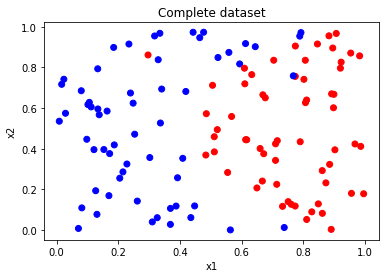

In [133]:
from sklearn.utils import shuffle
# Read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet_LR_a.csv', delimiter=',',skip_header=1)
X, y = Z[:,:-1], Z[:,-1]
X = np.hstack((np.ones((X.shape[0],1)),X))   #prepend ones for intercept

# Plot data distribution
color= ['red' if elem==1 else 'blue' for elem in y ]
plt.scatter(X[:,-2], X[:,-1], c=color)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Complete dataset')
# Split into test and training set
X_train=X[:int(X.shape[0]/2)]
X_test=X[int(X.shape[0]/2):]
y_train=y[:int(len(y)/2)]
y_test=y[int(len(y)/2):]

In [134]:
w_learned,losses=fitLogRegModel(X_train, y_train)
pred_train=predictLogReg(w_learned, X_train) #as a check
pred_test=predictLogReg(w_learned, X_test)
print("The learnt weights are: w =",w_learned)

Loss at iteration 0:37.962176963645234
Loss at iteration 1000:34.4808767491126
Loss at iteration 2000:32.22467194531835
Loss at iteration 3000:30.402664860294138
Loss at iteration 4000:28.90885912574766
Loss at iteration 5000:27.6700773966336
Loss at iteration 6000:26.63154405159899
Loss at iteration 7000:25.75201223130943
Loss at iteration 8000:25.00017101527092
Loss at iteration 9000:24.352013764083267
Loss at iteration 10000:23.788934164283333
Loss at iteration 11000:23.296352353053024
Loss at iteration 12000:22.862720210647982
Loss at iteration 13000:22.4787962755192
Loss at iteration 14000:22.137112596669546
Loss at iteration 15000:21.831578925798745
Loss at iteration 16000:21.55718591834873
Loss at iteration 17000:21.309780336731084
Loss at iteration 18000:21.08589310814038
Loss at iteration 19000:20.882606554856707
Loss at iteration 20000:20.697450935255663
Loss at iteration 21000:20.528323122606004
Loss at iteration 22000:20.373422156359673
Loss at iteration 23000:20.2311977655

Text(0.5, 1.0, 'Test dataset - predictions')

<Figure size 432x288 with 0 Axes>

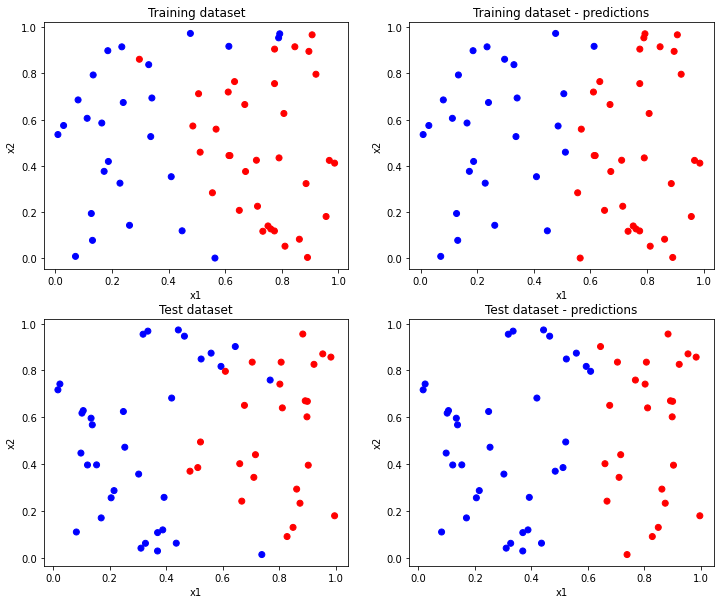

In [135]:
# Nothing to do here
# Plot training and test dataset
# Plot predictions for training and test dataset

fig = plt.figure()
fig = plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)
color= ['red' if elem>0.5 else 'blue' for elem in y_train ]
plt.scatter(X_train[:,-2], X_train[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset')

plt.subplot(2, 2, 2)
color= ['red' if elem>0.5 else 'blue' for elem in pred_train ]
plt.scatter(X_train[:,-2], X_train[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset - predictions')

plt.subplot(2, 2, 3)
color= ['red' if elem>0.5 else 'blue' for elem in y_test ]
plt.scatter(X_test[:,-2], X_test[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset')

plt.subplot(2, 2, 4)
color= ['red' if elem>0.5 else 'blue' for elem in pred_test ]
plt.scatter(X_test[:,-2], X_test[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset - predictions')

In [136]:
"""
Function that calculates the prediction for one or more new samples
@param prediction, np array, predicted values
@param true_values, np array, ground truth

@output pos, float, positive samples 
@output neg, float, negative samples 
@output tp, float, true positive samples 
@output tn, float, true negative samples 
@output fp, float, false positive samples 
@output fn, float, false negative samples 
@output acc, float, accuracy
@output balanced_acc, float, balanced accuracy
"""
def calc_acc(prediction, true_values, threshold = 0.5):
    prediction_labels = list()
    for preds in prediction:
        pred = 1 if preds>=0.5 else 0
        prediction_labels.append(pred)
    prediction_labels = np.asarray(prediction_labels)
    pos = ((prediction_labels == 1) & (true_values == 1)).sum()
    neg = ((prediction_labels == 0) & (true_values == 0)).sum()
    tp = ((prediction_labels == 1) & (true_values == 1)).sum()
    tn = ((prediction_labels == 0) & (true_values == 0)).sum()
    fp = ((prediction_labels == 1) & (true_values == 0)).sum()
    fn = ((prediction_labels == 0) & (true_values == 1)).sum()

    acc = (tp+tn)/(fp+fn+tp+tn)
    sens,spec = tp/(tp+fn) , tn/(fp+tn)
    balanced_acc = (sens+spec)/2
    return pos, neg, tp, tn, fp, fn, acc, balanced_acc


In [137]:
# Calculate accuracy and balanced accuracy for test set
result_train = calc_acc(pred_train, y_train)
result_test = calc_acc(pred_test, y_test)
print(result_train[-2])
print(result_train[-1])
print(result_test[-2])
print(result_test[-1])

0.8833333333333333
0.8834841628959276
0.8833333333333333
0.8789592760180995


0.9671945701357467


<function matplotlib.pyplot.show(close=None, block=None)>

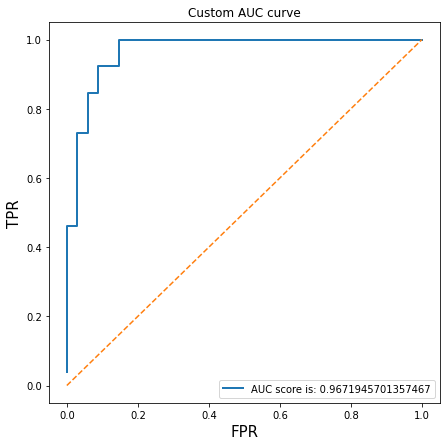

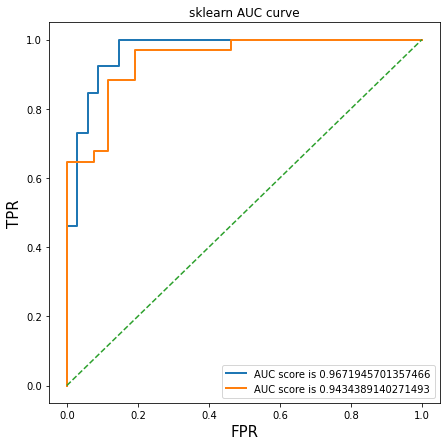

In [138]:

tpr = lambda tp,fn: tp/(tp+fn)
fpr = lambda tn,fp: fp/(fp+tn)


tpr_list,fpr_list = [],[]
thresholds = np.linspace(start=np.max(pred_test),stop=np.min(pred_test),num=500)

for t in thresholds:
    temp_pre = [1 if x >= t else 0 for x in pred_test]
    temp_pre = np.asarray(temp_pre,dtype=float)
    pos, neg, tp, tn, fp, fn, acc, balanced_acc = calc_acc(temp_pre,y_test)
    temp_tpr,temp_fpr = tpr(tp,fn),fpr(tn,fp)
    tpr_list.append(temp_tpr),fpr_list.append(temp_fpr)

rocAUC = auc(fpr_list, tpr_list)
print(rocAUC)

plt.figure(figsize=(7,7))
plt.plot(fpr_list, tpr_list, lw=2, label=f'AUC score is: {auc(fpr_list, tpr_list)}')
plt.plot(fpr_list, fpr_list, "--")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.legend()
plt.title('Custom AUC curve')
plt.show

# sklearn AUC curve

fpr, tpr, thresholds = roc_curve(y_test, pred_test)
fpr_train, tpr_train, train_thresholds = roc_curve(y_train, pred_train)
auc_score_test, auc_score_train = auc(fpr, tpr), auc(fpr_train, tpr_train)


plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, lw=2, label=f'AUC score is {auc_score_test}')
plt.plot(fpr_train, tpr_train, lw=2, label=f'AUC score is {auc_score_train}')
plt.plot(fpr, fpr, "--")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.title('sklearn AUC curve')
plt.legend()
plt.show
